# 线性回归（Linear Regression）
## 回归分析
**回归分析**是用来评估变量之间关系的统计过程。用来解释自变量X与因变量Y的关系。即当自变量X发生改变时，因变量Y会如何发生改变。

## 线性回归
回归分析的一种，评估的自变量X与因变量Y之间是一种线性关系。当只有一个自变量时，称为**一元线性回归**，当具有多个自变量时，称为**多元线性回归**。

**拟合**，是指构建一种算法（数学函数），使得该算法能够符合真实的数据。从机器学习角度讲，线性回归就是要构建一个线性函数，使得该函数与目标值之间的拟合性最好。从空间的角度来看，就是要让函数的直线（面），尽可能穿过空间中的数据点。线性回归会输出一个连续值。  
![线性回归](imgs/01.png "线性回归")



### 一元线性回归
我们从简单的一元线性回归开始。这里，我们以房屋面积（x）与房屋价格（y）为例，显而易见，二者是一种线性关系，房屋价格正比于房屋面积，我们假设比例为w：  
$$\hat{y} = wx$$  
然而，这种线性方程一定是过原点的，即当x为0时，y也一定为0。这可能并不符合现实中某些场景。为了能够让方程具有更广泛的适应性，我们这里再增加一个截距，设为b，即之前的方程变为：  
$$\hat{y} = wx + b$$  
假定数据集如下：  

| 房屋面积 | 房屋价格 |
| -------- | ------- |
| 30 | 100 |
| 40 | 120 |
| 40 | 115 |
| 50 | 130 |
| 50 | 132 |
| 60 | 147 |

线性回归是用来解释变量之间的关系，但是，这种关系并非严格的函数映射关系。从数据集中，我们也看到了这一点。相同面积的房屋，价格并不完全相同，但是，也不会相差过大。 

### 多元线性回归
然而，现实中的数据可能是比较复杂的，自变量也很可能不只一个。例如，影响房屋价格也很可能不只房屋面积一个因素，可能还有距地铁距离，距市中心距离，房间数量，房屋所在层数，房屋建筑年代等诸多因素。不过，这些因素，对房屋价格影响的力度（权重）是不同的，例如，房屋所在层数对房屋价格的影响就远不及房屋面积，因此，我们可以使用多个权重来表示多个因素与房屋价格的关系：
$$\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + …… + w_nx_n + b$$  

其中，每个x为影响因素，每个w为对应的影响力度，y为房屋的价格。我们也可以使用向量的表示方式，设x与w为两个向量：
$$\begin{align}w &= (w_1, w_2, w_3, …… w_n)\\ 
x &= (x_1, x_2, x_3, …… x_n)\end{align}$$

则方程可表示为：
$$\begin{align}\hat{y} &= \sum\limits_{i=1}^{n}w_{i}x_{i} + b\\ 
\ \ &= w ^Tx + b\end{align}$$ 

我们也可以令：
$$\begin{align}\left\{\begin{matrix}x_{0} &= 1
 & \\ w_{0} &= b  
 & 
\end{matrix}\right.\end{align}$$  

这样，就可以表示为：  
$$\begin{align}\hat{y} &= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + …… + w_nx_n\\ 
\ \ &= \sum\limits_{i=0}^{n}w_{i} x_{i}\\ 
\ \ &= w ^ {T}x\end{align}$$ 

多元线性回归在空间中，可以表示为一个超平面，去拟合空间中的数据点。
![多元线性回归](imgs/02.png "多元线性回归")

## 损失函数
通过之前的介绍，我们得知，对机器学习来讲，就是从已知数据去建立一个模型，使得该模型能够对未知的数据进行预测。实际上，机器学习的过程，就是确定模型参数的过程，因为只要模型的参数确定了，我们就可以利用模型进行预测。
那么，<span style="color:red;">模型的参数该如果求解呢？</span>对于监督学习来说，我们可以通过建立损失函数来实现。<br>
* **损失函数**
    + 也叫目标函数或者代价函数
    + 是一个关于误差的函数
    + 用来衡量模型预测值与真实值之间的差异
    + 习惯使用J来表示，例如，J(w)则表示以w为自变量的函数。
    
也就是说，损失函数是一个关于模型参数的函数。我们的目标，就是要在自变量取值的可能组合中，找到一组最合适的值，使得损失函数的值最小。  



## 参数求解
* 最小二乘法
    + 线性假设下的一种有闭式解的参数求解方法，最终结果为全局最优
* 梯度下降法
    + 一种通过迭代更新来逐步进行的参数优化方法，最终结果为局部最优

##### 误差与分布
接下来，我们来看一下线性回归模型中的误差。正如我们之前所提及的，线性回归解释的变量（现实中存在的样本），是存在线性关系的。然而，这种关系并不是严格的函数映射关系，但是，我们构建的模型（方程）却是严格的函数映射关系的，因此，对于每个样本来说，我们拟合的结果会与真实值之间存在一定的误差：  
$$\begin{align}\hat{y} ^ {(i)} &= w ^ {T}  x ^ {(i)}\\ 
y ^ {(i)} &= \hat{y} ^ {(i)} + \varepsilon ^ {(i)}
\end{align}$$ 
其中，$\varepsilon ^ {(i)}$表示每个样本与实际值之间的误差。<br>

<font face="楷体" size=3>说明：在机器学习中，习惯用上标表示样本，用下标表示特征。</font>

由于每个样本的误差$\varepsilon$是独立同分布的，根据中心极限定理，$\varepsilon$服从均值为0，方差为$\sigma ^ {2}$的正态分布。因此，根据正态分布的概率密度公式：  

$$\begin{align}p(\varepsilon ^ {(i)}) &= \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(\varepsilon ^ {(i)}) ^ {2}}{2\sigma ^ {2}})\\ 
p(y ^ {(i)}|x ^ {(i)};w) &= \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}}{2\sigma ^ {2}})
\end{align}$$

##### 最大似然估计
以上是一个样本的概率密度，我们假设数据集中共有m个样本，每个样本具有n个特征，则多个样本的联合密度函数（似然函数）为：  

$$\begin{align}L(w) &= \prod \limits_{i=1}^{m}p(y ^ {(i)}|x ^ {(i)};w)\\ 
&= \prod\limits_{i=1}^{m}\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}}{2\sigma ^ {2}})
\end{align}$$

我们要让误差最小，则要让似然函数最大，则此时参数w的值，就是我们要求解的值。不过，累计乘积的方式不利于求解，我们这里使用对数似然函数，即在联合密度函数上取对数操作（取对数操作不会改变函数的极值点），这样就可以将累计乘积转换为累计求和的形式。  
$$\begin{align}ln(L(w)) &= ln\prod\limits_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}}{2\sigma ^ {2}})\\ 
&= \sum\limits_{i=1}^{m}ln\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}}{2\sigma ^ {2}})\\ 
&=\sum\limits_{i=1}^{m}[ln\frac{1}{\sqrt{2\pi}\sigma}+lnexp(-\frac{(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}}{2\sigma ^ {2}})]\\
&= mln\frac{1}{\sqrt{2\pi}\sigma} - \frac{1}{\sigma ^ {2}}  \frac{1}{2}\sum\limits_{i=1}^{m}(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}
\end{align}$$

上式中，前半部分都是常数，我们的目的是为了让联合密度概率值最大，因此，我们只需要让后半部分的值最小即可，因此，后半部分，就可以作为模型的损失函数。该函数是二次函数，具有唯一极小值。  

### 最小二乘法（ordinary least squares，OLS）
**最小二乘法**，通过让样本数据的预测值与真实值之间的误差平方和最小，进而求解参数的方法。  
* 我们可以通过极大似然估计，寻找出目标函数。
* 我们也可以直观的进行分析。我们的目的，其实就是要寻找一条合适的直线（平面），使得所有样本距离直线（平面）的距离达到最小化即可。因此，我们可以采用每个样本的预测值与真实值之差，然后取平方和的方式，能够让该平方和最小的w，就是我们需要求解的w。<img src="imgs/ols.png" width="300">
<br><span style="color:red">思考：为什么要用平方和，而不是直接求和？  </span>

现在，我们的得到了目标函数：
$J(w) = \frac{1}{2}\sum\limits_{i=1}^{m}(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}$
 
由于：  
$%y_hat定义
\hat{y} = \begin{pmatrix}
\hat{y} ^ {(1)}\\ 
\hat{y} ^ {(2)}\\ 
……\\ 
\hat{y} ^ {(m)}
\end{pmatrix} = 
\begin{pmatrix}
w ^ {T} x ^ {(1)}\\ 
w ^ {T} x ^ {(2)}\\ 
……\\ 
w ^ {T} x ^ {(m)}
\end{pmatrix} = 
%wi * xi 展开式
\begin{pmatrix}
w_{1}x_{1} ^ {(1)} + w_{2}x_{2} ^ {(1)} + …… + w_{n}x_{n} ^ {(1)}\\ 
w_{1}x_{1} ^ {(2)} + w_{2}x_{2} ^ {(2)} + …… + w_{n}x_{n} ^ {(2)}\\ 
……\\ 
w_{1}x_{1} ^ {(m)} + w_{2}x_{2} ^ {(m)} + …… + w_{n}x_{n} ^ {(m)}
\end{pmatrix} = 
\begin{pmatrix}
x_{1} ^ {(1)}, x_{2} ^ {(1)}, ……x_{n} ^ {(1)}\\ 
x_{1} ^ {(2)}, x_{2} ^ {(2)}, ……x_{n} ^ {(2)}\\ 
……\\ 
x_{1} ^ {(m)}, x_{2} ^ {(m)}, ……x_{n} ^ {(m)}
\end{pmatrix} \cdot
\begin{pmatrix}
w_{1}\\ 
w_{2}\\ 
……\\ 
w_{n}
\end{pmatrix} = X\cdot w $

$
%y的定义
y = \begin{pmatrix}
y ^ {(1)}\\ 
y ^ {(2)}\\ 
……\\ 
y ^ {(m)}
\end{pmatrix}\qquad
$

$
%error定义
error = \begin{pmatrix}
error ^ {(1)}\\ 
error ^ {(2)}\\ 
……\\ 
error ^ {(m)}
\end{pmatrix} = 
\begin{pmatrix}
\hat{y} ^ {(1)} - y ^ {(1)}\\ 
\hat{y} ^ {(2)} - y ^ {(2)}\\ 
……\\ 
\hat{y} ^ {(m)} - y ^ {(m)}
\end{pmatrix} = \hat{y} - y = X\cdot w - y\qquad  \\ \Rightarrow
%error总结
\sum\limits_{i=1}^{m}(error ^ {(i)}) ^ {2} = 
\sum\limits_{i=1}^{m}(\hat{y} ^ {(i)} - y ^ {(i)}) ^ {2} = 
\sum\limits_{i=1}^{m}( w ^ {T}x ^ {(i)} - y ^ {(i)}) ^ {2} = error ^ {T} \cdot error
$


即：  

$$\begin{align}J(w) &= \frac{1}{2}\sum\limits_{i=1}^{m}(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}\\ 
&= \frac{1}{2}(Xw - y) ^ {T}(Xw - y)\end{align}
$$
</font>  
我们要求该目标函数的最小值，只需要对自变量w进行求导，导数为0时w的值，就是我们要求解的值。  

$$\begin{align}\triangledown_{w} J(w) &= \triangledown_{w}(\frac{1}{2}(Xw - y) ^ {T}(Xw - y))\\ 
&= \triangledown_{w}(\frac{1}{2}(w ^ {T}X ^ {T} - y ^ {T})(Xw - y))\\ 
&= \triangledown_{w}(\frac{1}{2}(w ^ {T}X ^ {T}Xw - w ^ {T}X ^ {T}y - y ^ {T}Xw + y ^ {T}y))\\\end{align} 
$$

根据矩阵与向量的求导公式，有：  

$$\begin{align}\frac{\partial A\vec{x}}{\partial \vec{x}} &= A ^ {T} \\ 
\frac{\partial A\vec{x}}{\partial \vec{x} ^ {T}} &= A \\ 
\frac{\partial (\vec{x} ^ {T}A)}{\partial \vec{x}} &= A \\ 
\frac{\partial (\vec{x} ^ {T}A\vec{x})}{\partial \vec{x}} &= (A ^ {T} + A)\vec{x} \\ 
\end{align}$$

特别的，如果$A = A ^ {T}$（A为对称矩阵），则：  

$$\frac{\partial (\vec{x} ^ {T}A\vec{x})}{\partial \vec{x}} = 2A\vec{x}
$$
因此：  
$$\begin{align}\triangledown_{w}(\frac{1}{2}(w ^ {T}X ^ {T}Xw - w ^ {T}X ^ {T}y - y ^ {T}Xw + y ^ {T}y))&= \frac{1}{2}(2X ^ {T}Xw - X ^ {T}y - (y ^ {T}X) ^ {T})\\ 
&= X ^ {T}Xw - X ^ {T}y
\end{align}$$
令导函数的值为0，则：  
$$w = (X ^ {T}X) ^ {-1}X ^ {T}y
$$ 

以上的求解方式，就是**最小二乘法**。<br>

<span style="color:red;">注意：使用最小二乘法求解的时候，要求矩阵$X ^ {T}X$必须是可逆的。</span>

## 梯度下降法
为什么要使用梯度下降算法求解呢？
* 绕过对矩阵求逆
* 在算法上更容易实现

### 概念
##### 微分
* 单变量
    > $\begin{align}
       \frac{d}{dx}x^2 &= 2x \\
       \frac{d}{dy}(-2y^3) &= -6y^2 \\
       \frac{d}{dx}(x-6)^2 &= 2(x-6)\frac{d}{dx}(x-6)=2(x-6)
      \end{align}$
    
* 多变量
    > $\begin{align}
       \frac{\partial}{\partial x}x^2y^2 &= 2xy^2 \\
       \frac{\partial}{\partial y}(x^2-2y^3) &= -6y^2 \\
       \frac{\partial}{\partial z}(5x+6y-10z)&= -10
      \end{align}$

##### 梯度
* 梯度就是分别对每个变量求微分，公式：$$\triangledown f(x_1, x_2, ...)=(\frac{\partial f(x_1, x_2, ...)}{\partial x_1}, \frac{\partial f(x_1, x_2, ...)}{\partial x_2}, ...)$$ 
* 是一个向量，表示函数在某一点处的方向导数，当 $f(x)$ 只有一个自变量时，梯度就是导数。
* 函数值在这点沿着该方向变化最快
* 对于凸函数而言，梯度方向指向函数值增大的方向，负梯度方向指向函数值减少的方向

##### 理解梯度下降
梯度下降(上升)法的基本思想可以类比为一个下山的过程。假设这样一个场景：
>一个人被困在山上，需要从山上下来，也就是找到山谷。但此时山上的浓雾很大，导致能见度很低。因此，下山的路径就无法确定，他必须利用自己周围的信息去找到下山的路径。这个时候，他就可以利用梯度下降算法思想来帮助自己下山。<br><br>具体来说就是：以他当前的所处的位置为基准，寻找这个位置最陡峭的地方，然后朝着山的高度下降的地方走。同理，如果我们的目标是上山，也就是爬到山顶，那么此时应该是朝着最陡峭的方向往上走。然后每走一段距离，都反复采用同一个方法，最后就能成功的抵达山谷（山顶）。

<img src="imgs/tdxj.png" width="">

### 梯度下降求解
对于损失函数：
$$J(w) = \frac{1}{2}\sum\limits_{i=1}^{m}(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}$$  
什么样的参数能使得目标函数达到极小值点，也就是寻找山谷最低点？我们可以使用梯度下降的方式，不断去调整权重$w$，进而去减小损失函数$J(w)$的值。经过不断迭代，最终求得最优的权重$w$，使得损失函数的值最小（近似最小）。
调整方式为：  

$$w = w - \alpha\triangledown_wJ(w)$$

>* $\alpha$ 在梯度下降算法中被称作为学习率或者步长，意味着我们可以通过 $\alpha$ 来控制每一步走的距离，以保证不要因为走太快，错过了最低点。同时也要保证不要走的太慢，导致太阳下山了，还没有走到山下。所以 $\alpha$ 的选择在梯度下降法中往往是很重要的！ $\alpha$ 不能太大也不能太小，太小的话，可能导致迟迟走不到最低点，太大的话，会导致错过最低点！（<span style="color:red">$\alpha$ 又叫超参数：需要人为事先指定的参数</span>）
<img src="imgs/alpha.png" width="400"><br>
* 梯度前加一个负号，就意味着朝着梯度相反的方向前进！我们在前文提到，梯度的方向实际就是函数在此点上升最快的方向！而我们需要朝着下降最快的方向走，自然就是负的梯度的方向，所以此处需要加上负号

我们这里先单独对一个样本求梯度来演示，所有样本，只需要最后进行累计求和即可。  

$$\begin{align}\frac{\partial J(w)}{\partial w_j} &= \frac{\partial}{\partial w_j}\frac{1}{2}(y ^ {(i)} - w ^ {T}x ^ {(i)}) ^ {2}\\ 
&= 2 * \frac{1}{2} * (y ^ {(i)} - w ^ {T} x ^ {(i)})\frac{\partial}{\partial w_j}(y ^ {(i)} - w ^ {T}x ^ {(i)})\\ 
&= (y ^ {(i)} - w ^ {T}x ^ {(i)})\frac{\partial}{\partial w_j}(y ^ {(i)} - \sum_{j=1}^{n}w_jx_j^{(i)})\\ 
&= -(y ^ {(i)} - w ^ {T}x ^ {(i)})x_j\\ 
&= -(y ^ {(i)} - \hat y ^ {(i)})x_j
\end{align}$$  

### 梯度下降分类
梯度下降可以分为三类：
* 随机梯度下降（Stochastic Gradient Descent，SGD）
* 批量梯度下降（Batch Gradient Descent，BGD）
* 小批量梯度下降（Mini-Batch Gradient Descent，MBGD）

## 一维梯度下降
程序：使用梯度下降求解方程$y=x^{2} - 2x + 1$的最小值。  
观察学习率对梯度下降的影响。学习率不是越大越好，也不是越小越好。

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"]=False

%matplotlib qt 
# inline 默认

# 定义原函数，这里可以想象成为是损失函数。我们的目的就是
# 要求极值点（极小值）。也就是说，我们要求一个（组）合适的x，
# 使得损失函数的值最小。
def f(x):
    return x ** 2 - 2 * x + 1

# 定义导函数（梯度）
def gradient(x):
    return 2 * x - 2

# 定义x的初始位置，即梯度下降的开始位置。
x = 10

# 定义列表（Java中的数组），来保存x与y的轨迹。即随着x的调整，
# x与y的值。
x_list = []
y_list = []

# 定义学习率。用来控制梯度下降的过程中，调整步幅的大小。
alpha = 0.9

# 进行迭代，不断去调整x的值，进而使得y的值不断进行减小。
for i in range(30):
    # 使用列表加入x与y的移动轨迹。
    x_list.append(x)
    y_list.append(f(x))
    # 根据梯度调整x的值，进而令y的值不断减小。
    x -= alpha * gradient(x)
# 输出x与y的移动轨迹。
# print(y_list)
# print(x_list)

# 构建数据x。
x = np.linspace(-9, 11, 200)
# 构建数据y。
y = x ** 2 - 2 * x + 1
# 画出图像（抛物线。）
plt.plot(x, y)
# 设置标题。支持Latex语法。
plt.title("函数$y=x^{2}-2x+1$的图像")
# 绘制x与y的移动轨迹。r 红色线。 o 点以实心圈形式展示。--虚线。
plt.plot(x_list, y_list, "ro--")
plt.show()

## 二维梯度下降
程序：使用梯度下降求解方程$y = 0.2(x1 + x2) ^ {2} - 0.3x1x2 + 0.4$的最小值。

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"]=False
#tk是默认
%matplotlib qt 


# 定义原函数
def f(x1, x2):
    return 0.2 * (x1 + x2) ** 2 - 0.3 * x1 * x2 + 0.4

# 损失函数对x1求偏导的梯度
def gradient_x1(x1, x2):
    return 0.4 * (x1 + x2) - 0.3 * x2

# 损失函数对x2求偏导的梯度
def gradient_x2(x1, x2):
    return 0.4 * (x1 + x2) - 0.3 * x1

# 定义学习率。
alpha = 0.7
# 定义列表，用来保存x与y的更新轨迹。
x1_list = []
x2_list = []
y_list = []
# 定义初始点。
x1, x2 = 4.5, 4.5

# 进行循环迭代，不断去调整x1与x2的值，使得y（损失函数）的值最小。
for i in range(50):
    # 加入x1，x2与y的移动轨迹。
    x1_list.append(x1)
    x2_list.append(x2)
    y_list.append(f(x1, x2))
    # 更新x1与x2。
    x1 -= alpha * gradient_x1(x1, x2)
    x2 -= alpha * gradient_x2(x1, x2)
# 输出x1，x2与y的轨迹。
# print(x1_list)
# print(x2_list)
# print(y_list)

X1 = np.arange(-5, 5, 0.05)
X2 = np.arange(-5, 5, 0.05)
# 进行网格扩展。X1与X2都会扩展成为二维数组。
X1, X2 = np.meshgrid(X1, X2)
Y = np.array([X1.ravel(), X2.ravel()]).T
Y = f(Y[:, 0], Y[:, 1])
# 将Y的形状改变成语X1的形状相同，目的是为了稍后的可视化。
Y = Y.reshape(X1.shape)

fig = plt.figure()
ax = Axes3D(fig)
# 绘制三维曲面图。
surf = ax.plot_surface(X1, X2, Y, rstride=5, cstride=5, cmap="rainbow")
# 绘制点移动的轨迹
ax.plot(x1_list, x2_list, y_list, 'bo--')
# 显示颜色条。
# fig.colorbar(surf)
plt.title("函数$y = 0.2(x1 + x2) ^ {2} - 3x1x2 + 0.4$")
plt.show()

## 一元线性回归程序示例

接下来，我们来实现一元线性回归。

In [3]:
import numpy as np

x = np.array([[1, 2, 3], [3, 4, 5]])
# ravel() 将多维数组拉伸成一维数组。
print(x)
x = x.ravel()
print(x)

[[1 2 3]
 [3 4 5]]
[1 2 3 3 4 5]


In [19]:
import numpy as np

# 用于线性回归的类
from sklearn.linear_model import LinearRegression
# 用来切分训练集与测试集
from sklearn.model_selection import train_test_split

# 设置随机种子。这样，只要随机种子相同，我们就能够产生相同的随机序列值。
np.random.seed(0)

# 生成样本。在[-10, 10]之间，生成1000个数据，该数据是等差数列。
x = np.linspace(-10, 10, 1000)

# 将x转换为二维矩阵的形式，目的是可以应用到最小二乘公式中。
x = x.reshape(-1, 1)

# 生成标签。(矢量化计算，以整个数组进行计算。实际上，就是对应数组中的每个分量进行计算。)
y = 0.85 * x - 0.72

# 产生噪声（波动）。（随机的误差，服从正态分布。）
e = np.random.normal(scale=0.5, size=x.shape)
y += e

# 创建线性回归类，底层就是使用最小二乘法进行计算的。
lr = LinearRegression()

# 分割数据集与标签，test_size默认值为0.25,。random_state就是随机种子，可以让随机序列重现。
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=0)

# fit 拟合模型，训练模型。
lr.fit(train_X, train_y)

# 输出训练之后的系数与截距。
# lr.coef_ 就是模型中的w（权重）。
# lr.intercept_ 就是模型中的截距（偏置）b。
print(f"权重：{lr.coef_}")
print(f"截距：{lr.intercept_}")

# 从训练集学习到了模型的参数（系数与截距），因此，就使用训练的系数与截距进行测试（预测）。
result = lr.predict(test_X)

# ravel() 将多维数组拉伸成一维数组。
# [:10]是Python中切片语法，表示获取数组中前10个元素。包含起始点，不包含终止点。
print(f"实际值：{test_y.ravel()[:10]}")
print(f"预测值：{result.ravel()[:10]}")

权重：[[0.84950096]]
截距：[-0.74126877]
实际值：[ 7.79829165  5.41032022 -4.34865344  0.05661304  1.24258389  7.78796484
 -8.85413247 -5.53572901 -4.67992203  3.26223688]
预测值：[ 7.65169863  5.37275712 -4.16818454  0.16860713  2.19244324  7.27754405
 -8.77708862 -5.30765529 -4.03212833  2.77068213]


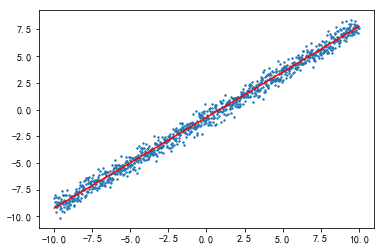

In [20]:
# 进行可视化展示。
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文字体，以至于可以支持中文的显示。
mpl.rcParams["font.family"] = "SimHei"
# 当设置中文字体后，减号（负号）会使用Unicode字符集中的减号，该减号显示不正常，
# 为了能够正常显示减号，我们将减号还原为ASCII字符集中的减号。
mpl.rcParams["axes.unicode_minus"] = False
%matplotlib inline
# 绘制数据的散点图。
# x所有横坐标构成的数组。y所有纵坐标构成的数组。s设置散点大小。
plt.scatter(x, y, s=2)
# 绘制回归线。回归线会使得误差和最小。
plt.plot(x, lr.predict(x), "r-")

## 线性回归模型评估
当我们建立好模型后，模型的效果如何呢？我们可以采用如下的指标来进行衡量。  
* MSE
* RMSE
* MAE
* $R ^ {2}$

### MSE
MSE（Mean Squared Error），平均平方误差，为所有样本误差（真实值与预测值之差）的平方和，然后取均值。

$MSE = \frac{1}{m}\sum\limits_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ {2}$


### RMSE
RMSE（Root Mean Squared Error），平均平方误差的平方根，即在MSE的基础上，取平方根。

$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ {2}}$


### MAE
MAE（Mean Absolute Error），平均绝对值误差，为所有样本误差的绝对值和。
$MAE = \frac{1}{m}\sum\limits_{i=1}^{m}|y ^ {(i)} - \hat{y} ^ {(i)}|$


### $R ^ {2}$
$R ^ {2}$为决定系数，用来表示模型拟合性的分值，值越高表示模型拟合性越好，最高为1，可能为负值。  
$R ^ {2}$的计算公式为1减去RSS与TSS的商。其中，TSS（Total Sum of Squares）为所有样本与均值的差异，是方差的m倍。而RSS（Residual sum of squares）为所有样本误差的平方和，是MSE的m倍。  

$R ^ {2} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum\limits_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ {2}}
{\sum\limits_{i=1}^{m}(y ^ {(i)} - \overline{y}) ^ {2}} \\ 
\overline{y} = \frac{1}{m}\sum\limits_{i=1}^{m}y ^ {(i)}
$
 
从公式定义可知，最理想情况，所有的样本的预测值与真实值相同，即RSS为0，此时$R ^ {2}$为1。

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"均方误差：{mean_squared_error(result, test_y)}")
print(f"根均方误差：{np.sqrt(mean_squared_error(result, test_y))}")
print(f"平均绝对值误差：{mean_absolute_error(result, test_y)}")
print(f"训练集R^2：{lr.score(train_X, train_y)}")
print(f"测试集R^2：{lr.score(test_X, test_y)}")

均方误差：0.2163227899666729
根均方误差：0.4651051386156391
平均绝对值误差：0.35911863171860864
训练集R^2：0.9897181522561767
测试集R^2：0.9908097071925296


## 多元线性回归程序示例
类似的，我们也可以实现多元线性回归。这里，我们需要创建多个特征（x），我们也可以像之前程序那样，随机生成多个特征，不过，这里，我们使用sklearn库提供的更方便的方法。

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
# 生成线性回归的样本数据。
X, y, coef = make_regression(n_samples=1000, n_features=2, coef=True, bias=10, random_state=0, noise=10)
train_X, test_X, train_y, test_y = train_test_split(X, y)
print(f"实际权重：{coef}")
lr = LinearRegression()
lr.fit(train_X, train_y)
print(f"权重：{lr.coef_}")
print(f"截距：{lr.intercept_}")
result = lr.predict(test_X)
print(f"均方误差：{mean_squared_error(result, test_y)}")
print(f"训练集R^2：{lr.score(train_X, train_y)}")
print(f"测试集R^2：{lr.score(test_X, test_y)}")

实际权重：[41.09157343 40.05104636]
权重：[40.73604427 40.46442694]
截距：9.674800561121165
均方误差：89.70245095954746
训练集R^2：0.9719426911451446
测试集R^2：0.9711734155220718


In [8]:
from sklearn.datasets import make_regression
?make_regression

In [3]:
# 进行可视化展示。
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

max1, max2 = np.max(X, axis=0)
min1, min2 = np.min(X, axis=0)
x1 = np.linspace(min1, max1, 30)
x2 = np.linspace(min2, max2, 30)
X1, X2 = np.meshgrid(x1, x2)
fig = plt.figure()
ax = Axes3D(fig)
# 绘制真实的样本散点图。
ax.scatter(X[:, 0], X[:, 1], y, color="b")
# 绘制预测的平面。
surf = ax.plot_surface(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        rstride=5, cstride=5, cmap="rainbow", alpha=0.6)
# 绘制颜色条
fig.colorbar(surf)
plt.show()

In [1]:
from sklearn.datasets import make_regression
?make_regression

## 知识补充

### 过拟合与欠拟合
之前，我们介绍过拟合的概念。拟合指的是构建的模型能够符合样本数据的特征。与拟合相关的两个概念是欠拟合与过拟合。
* 欠拟合：模型过于简单，未能充分捕获样本数据的特征。表现为模型在训练集上的效果不好。
* 过拟合：模型过于复杂，过分捕获样本数据的特征，从而将样本数据中一些特殊特征当成了共性特征。表现为模型在训练集上的效果非常好，但是在未知数据上的表现效果不好。

<img src="imgs/05.png" width="600">

### 解决方案
如果产生欠拟合，可以采用如下方式，来达到更好的拟合效果。
* 增加迭代次数
* 增加模型复杂度（例如，引入新的特征）
* 通过多项式扩展
* 使用更复杂的模型（例如非线性模型）

如果产生过拟合，可以采用如下方式，来降低过拟合的程度。
* 收集更多的数据
* 正则化
* 降低模型的复杂度
* 减少迭代次数
* 选择简单的模型

现在，我们来介绍下多项式扩展与正则化。

### 多项式扩展
我们可以使用线性回归模型来拟合数据，然而，在现实中，数据未必总是线性（或接近线性）的。当数据并非线性时，直接使用 Linear Regression 的效果可能会较差，产生欠拟合。

0.06907327573166855


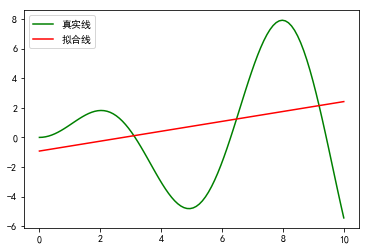

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

# 创建数据集x。np.newaxis表示新增一个维度，维度值为1。这与之前调用reshape(-1,1)实现同样的效果
x = np.linspace(0, 10, 100)[:, np.newaxis]
# 创建数据标签y。（非线性的分布）
y = x * np.sin(x)
lr = LinearRegression()
lr.fit(x, y)
# r2
print(lr.score(x, y))
plt.plot(x, y, "g-", label="真实线")
plt.plot(x, lr.predict(x), "r-", label="拟合线")
# 生成图例。
plt.legend()

此时，我们可以尝试使用多项式扩展来进行改进。  
多项式扩展，可以认为是对现有数据进行的一种转换，通过将数据映射到更高维度的空间中，该模型就可以拟合更广泛的数据。  
假设，我们有如下的二元线性模型：  
$\hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2}$  
如果该模型的拟合效果不佳，我们就可以对该模型进行多项式扩展。例如，我们进行二项式扩展（也可以进行更高阶的扩展），结果为：  
$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$  
当进行多项式扩展后，我们就可以认为，模型由以前的直线变成了曲线。从而可以更灵活的去拟合数据。

## 多项式拟合
经过多项式扩展后，我们依然可以使用之前的线性回归模型去拟合数据。这是因为，我们可以假设：  
$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$  
这样，之前的模型就会变成：  
$\hat{y} = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$  
从而，我们依然可以认为，这还是一种线性模型。

## 多项式转换规则
我们可以使用sklearn中提供的PolynomialFeatures类来实现多项式扩展。
* 通过powers_属性可以获取扩展之后每个输入特征的指数矩阵。
* powers_\[i, j\]表示第i个输出特征中，第j个输入特征的指数值。  
例如，如果输入样本的特征数为2，多项式扩展阶数为2，则指数矩阵为：
$$powers_ = \begin{bmatrix}
0 & 0\\ 
1 & 0\\ 
0 & 1\\ 
2 & 0\\ 
1 & 1\\ 
0 & 2
\end{bmatrix}$$  
多项式转换，其实就是将输入特征转换成输出特征。矩阵的每行对应每个输出特征，每列对应每个输入特征的指数，例如，对于两个输入特征$x_1与x_2$来讲，多项式转换之后的值为：  
$$[x_1^0x_2^0,\ x_1^1x_2^0,\ x_1^0x_2^1,\ x_1^2x_2^0,\ x_1^1x_2^1,\ x_1^0x_2^2]$$ 
即：  
$$[1,\ x_1,\ x_2,\ x_1^2,\ x_1 x_2,\ x_2^2]$$

In [4]:
import numpy as np
# 多项式扩展类。可以进行多项式转换。
from sklearn.preprocessing import PolynomialFeatures

# X = np.array([[1, 2, 3], [3, 4, 5]])
X = np.array([[1, 2], [3, 4]])
# 参数指定扩展的阶数。这里进行二阶扩展。
poly = PolynomialFeatures(2)
# 对输入数据进行转换。
# poly.fit(X)
# poly.transform(X)
# 相当于调用fit之后，再调用transform。
r = poly.fit_transform(X)
print("转换之后的结果：")
print(r)
print("指数矩阵：")
print(poly.powers_)
print(f"输入的特征数量：{poly.n_input_features_}")
print(f"输出的特征数量：{poly.n_output_features_}")

# 根据poly.powers_计算转换结果。
# 遍历样本集中的每一个样本，获取每个特征（这里就是x1，x2）
for x1, x2 in X:
    # 遍历幂指数矩阵。
    for e1, e2 in poly.powers_:
        print(x1 ** e1 * x2 ** e2, end="\t")
    print()

转换之后的结果：
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
指数矩阵：
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
输入的特征数量：2
输出的特征数量：6
1	1	2	1	2	4	
1	3	4	9	12	16	


现在，就让我们对之前的程序来进行多项式扩展，尝试解决欠拟合问题。

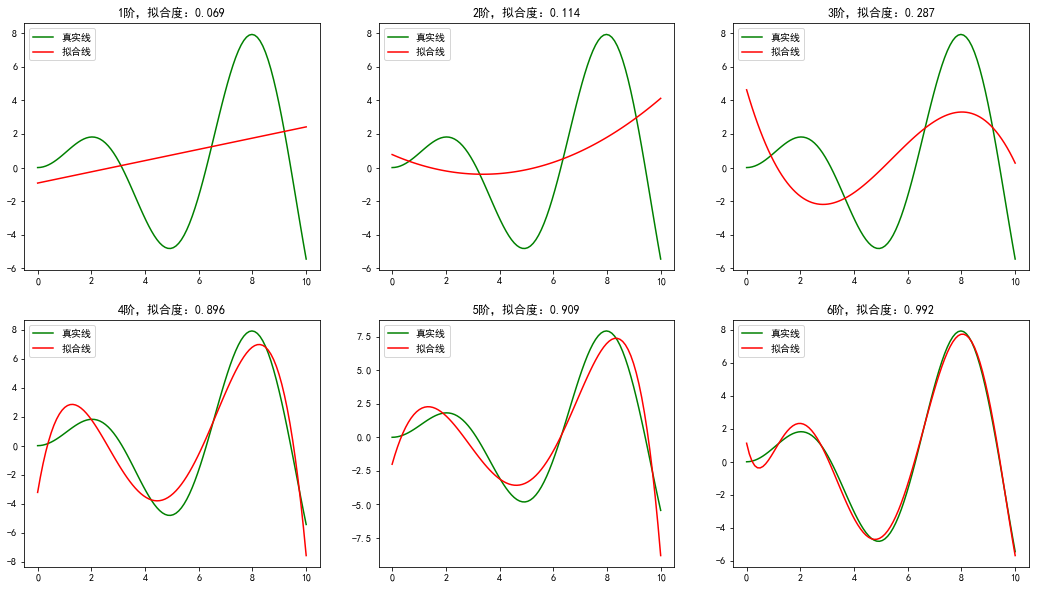

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

x = np.linspace(0, 10, 100)[:, np.newaxis]
y = x * np.sin(x)
# 创建绘图子区域（参数：行数与列数）
# ax 绘图对象数组。每个元素为一个自绘图区域对象。
figure, ax = plt.subplots(2, 3)
# 设置画布的大小。（宽度与高度），单位：英寸。
figure.set_size_inches(18, 10)
# 将二维数组进行扁平化，方便在for循环中使用。
ax = ax.ravel()

# range 产生从起始点到终止点的序列。包含起始点，不包含终止点。
for n in range(1, 7):
    poly = PolynomialFeatures(degree=n)
    tran_x = poly.fit_transform(x)
    lr = LinearRegression()
    # 使用多项式转换之后的特征进行拟合（训练）
    lr.fit(tran_x, y)
    # 设置绘图标题。
    ax[n - 1].set_title(f"{n}阶，拟合度：{lr.score(tran_x, y):.3f}")
    ax[n - 1].plot(x, x * np.sin(x), "g-", label="真实线")
    ax[n - 1].plot(x, lr.predict(tran_x), "r-", label="拟合线")
    ax[n - 1].legend()


## 正则化
在线性回归中，模型过于复杂，通常表现为模型的参数过大（指绝对值过大），即如果模型的参数过大，就容易出现过拟合现象。我们可以通过正则化来降低过拟合的程度。正则化，就是通过在损失函数中加入关于权重的惩罚项，进而限制模型的参数过大，从而减低过拟合，增加的惩罚项，我们也称作正则项。  
根据正则项的不同，我们可以将正则化分为如下几种：
* L2正则化
* L1正则化
* Elastic Net

### L2正则化
L2正则化是最常使用的正则化，将所有权重的平方和作为正则项。使用L2正则的线性回归模型称为<span style="color:red">Ridge回归（岭回归）</span>。加入L2正则化的损失函数为：  
<font size=3>$$J(w) = \frac{1}{2}\sum_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ 2 + \alpha \sum_{j=1}^{n}w_{j} ^ {2}$$</font>

从包含正则项的损失函数中，我们可以发现，我们将损失函数分为两部分，一部分为原来的损失函数，另外一部分为正则项的惩罚，这样，如果当权重过大时，即使原来的损失函数值很小，但是整个项的损失值会很多，因此，整个损失值（二者的和）也不会很小，从而，权重过大的w就可能不会成为最佳解。  
### L1正则化
L1正则化使用所有权重的绝对值和作为正则项。使用L1正则的线性回归模型称为<span style="color:red">LASSO回归（Least Absolute Shrinkage and Selection Operator——最小绝对值收缩与选择因子）</span>。  
<font size=3>$$J(w) = \frac{1}{2}\sum_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ 2 + \alpha \sum_{j=1}^{n}|w_{j}|$$</font>

### Elastic Net
Elastic Net（弹性网络），同时将绝对值和与平方和作为正则项，是L1正则化与L2正则化之间的一个折中。使用该正则项的线性回归模型称为<span style="color:red">Elastic Net</span>算法。  
<font size=3>
$$J(w) = \frac{1}{2}\sum_{i=1}^{m}(y ^ {(i)} - \hat{y} ^ {(i)}) ^ 2 + \alpha(p\sum_{j=1}^{n}|w_{j}| + (1 - p)\sum_{j=1}^{n}w_{j} ^ {2})$$
</font>  

<font face="楷体" size=3>  
说明：以上假设样本数量为m，特征数量为n。$\alpha > 0$并且$0 \leq p \leq 1$
</font>

(0.025118864315095822,
 3.9810717055349695e-11,
 -198.10222658699666,
 296.5051902131072)

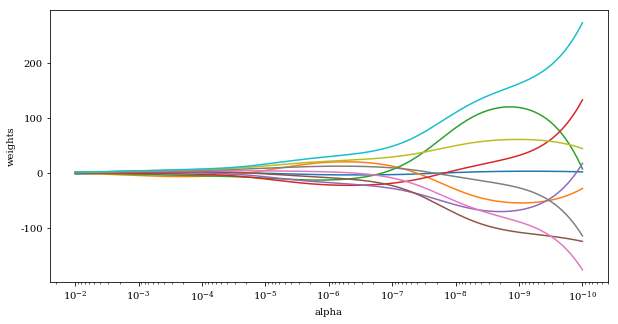

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["axes.unicode_minus"] = False

# 希尔伯特矩阵  A(i,j)=1/(i+j-1)
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

# 生成全是1的数组。参数指定数组元素的个数。
y = np.ones(10)

n = 200
# 返回等比数列。
alphas = np.logspace(-10, -2, n)
coefs = []
for a in alphas:
    # 岭回归，alpha参数指定就是惩罚力度。
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# 绘制图像
# 设置画布的大小。
plt.figure(figsize=(10, 5))

# gca  get current axes 获取当前的绘图对象。
ax = plt.gca()
ax.plot(alphas, coefs)

# 设置x轴的比例。（对数）
ax.set_xscale('log')

# 设置x轴的范围。将坐标轴逆序。
ax.set_xlim(ax.get_xlim()[::-1])

# 设置x轴的标签。
plt.xlabel('alpha')

# 设置y轴的标签。
plt.ylabel('weights')

# 紧凑显示。
plt.axis('tight')

## 模型持久化
当我们训练好模型后，就可以使用模型进行预测。然而，这毕竟不像打印一个Hello World那样简单，当我们需要的时候，重新运行一次就可以了。在实际生产环境中，数据集可能非常庞大，如果在我们每次需要使用该模型时，都去重新运行程序，势必会耗费大量的时间。  
为了方便以后能够复用，我们可以将模型保存，在需要的时候，直接加载之前保存的模型，就可以直接进行预测。其实，保存模型，就是保存模型的参数，在载入模型的时候，将参数恢复成模型保存时的参数而已。

### 保存模型    

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib

X, y = load_diabetes(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression()
lr.fit(train_X, train_y)
# 对模型进行保存。
joblib.dump(lr, "lr.model")

['lr.model']

### 载入模型
我们可以载入之前保存的模型，进行预测。

In [5]:
model = joblib.load("lr.model")
print(type(model))
print(model.predict(test_X))

<class 'sklearn.linear_model.base.LinearRegression'>
[241.84730258 250.12303941 164.96456549 119.11639346 188.23120303
 260.56079379 113.07583812 190.54117538 151.8883747  236.50848375
 168.76844138 180.52719713 109.16037049  90.20148392 244.73990469
  90.58113696 152.51268196  66.97735025  98.0467335  215.39557064
 197.70737206 160.9176914  162.88584001 158.25373793 202.44823294
 168.46663088 119.87243699  83.05669211 189.9839726  163.02279586
 177.07828326  82.6702699  144.53204953 146.07901596 141.73841253
 195.18658206 164.18043648 189.14768927 128.13330927 206.12996392
  82.64273523 164.94912645 144.46057692 182.0519825  178.41355601
  72.5504089  142.69750371 140.43671531 121.75256103 233.70553551
 162.07809758  76.90270416 155.68916375 156.64052259 238.11357481
 175.75735587 190.82555855 119.48230582 131.3142863  172.2453037
 214.44479397 171.30900357 156.69146772 110.9755974  257.79427463
 154.6473623   81.10560078 227.26610365 205.445138    46.92383044
  78.28098211 131.533520